<a href="https://colab.research.google.com/github/irontotoro/learning-bigdata/blob/main/learning_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(400, 2) (400,)
torch.Size([400, 2]) torch.Size([400, 1])


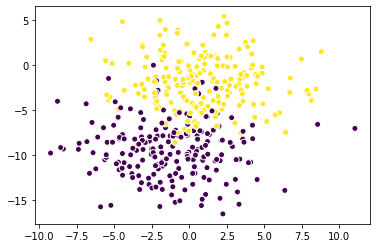

In [ ]:
from sklearn.datasets import make_blobs #numpy
import matplotlib.pyplot as plt
x, y= make_blobs(n_samples=[200,200],random_state=2,n_features=2,cluster_std=3)
print(x.shape,y.shape)
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='w')

import torch
x_torch=torch.from_numpy(x).type(torch.FloatTensor)
y_torch=torch.from_numpy(y).type(torch.FloatTensor).reshape(-1,1)
print(x_torch.shape,y_torch.shape)

In [ ]:
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression,self).__init__()
    self.linear=torch.nn.Linear(2,1)

  def forward(self,x):
    y_hat=self.linear(x)
    return torch.sigmoid(y_hat)
class LinearModel(torch.nn.Module):
  def __init__(self):
    super(LinearModel,self).__init__()
    self.linear=torch.nn.Linear(in_features=2,out_features=1)
  def forward(self,x):
    return self.linear(x)

In [ ]:
model1=LogisticRegression()
model2=LinearModel()
optimizer1=torch.optim.SGD(model1.parameters(),lr=0.01)
optimizer2=torch.optim.SGD(model2.parameters(),lr=0.01)
criterion1=torch.nn.BCELoss()
criterion2=torch.nn.MSELoss()

for epoch in range(5000):
  y_hat1=model1(x_torch)
  y_hat2=model2(x_torch)
  loss1=criterion1(y_hat1,y_torch)
  loss2=criterion2(y_hat2,y_torch)
  loss1.backward()
  loss2.backward()
  optimizer1.step()
  optimizer2.step()
  optimizer1.zero_grad()
  optimizer2.zero_grad()
for name,parameter in model1.named_parameters():
  print(name,parameter)
for name,parameter in model2.named_parameters():
  print(name,parameter)

linear.weight Parameter containing:
tensor([[0.1933, 0.5603]], requires_grad=True)
linear.bias Parameter containing:
tensor([2.9637], requires_grad=True)
linear.weight Parameter containing:
tensor([[0.0246, 0.0775]], requires_grad=True)
linear.bias Parameter containing:
tensor([0.9432], requires_grad=True)


ValueError: ignored

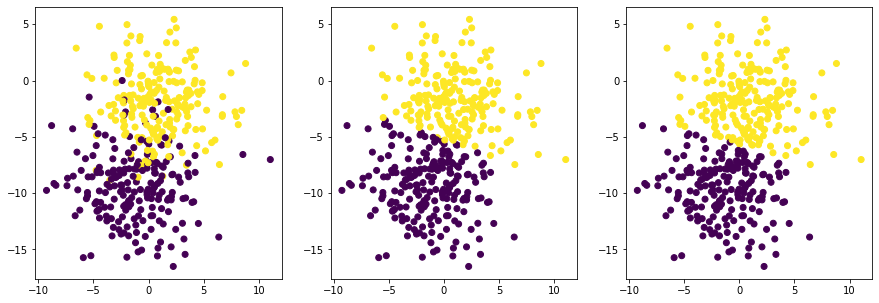

In [ ]:
y_pred1=model1.forward(x_torch)
y_pred2=model2.forward(x_torch)

test_result1=y_pred1.detach().numpy()>0.5
test_result2=y_pred2.detach().numpy()>0.5
#육안으로봐서는 모른다. 그래서 test set에 대해서 metric을 계산해야한다
#지금은 편의상 train,test 같게 사용 원래 ㄴㄴ
#여기서 우리는 accuracy라는 metrict을 사용해야함
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax1.scatter(x_torch[:,0],x_torch[:,1],c=y)
ax2=fig.add_subplot(1,3,2)
ax2.scatter(x_torch[:,0],x_torch[:,1],c=test_result1)
ax3=fig.add_subplot(1,3,3)
ax3.scatter(x_torch[:,0],x_torch[:,1],c=test_result2)
acc1=0
acc2=0

for pred1,pred2, gt in zip(test_result1,y):

  if int(pred1)==gt:
    acc1+=1
  if int(pred2)==gt:
    acc2+=1
print("implemented acc1",acc1/len(test_result1))
print("implemented acc2",acc1/len(test_result1))
list1=[1,2,3]
list2=[4,5,6]
from sklearn.metrics import accuracy_score
lib_acc1=accuract_score(y[300:],test_result1)
lib_acc2=accuract_score(y[300:],test_result2)
print("acc1 from the existing library",lib_acc1)
print("acc2 from the existing library",lib_acc2)

In [ ]:
#숙제 train testset으로 나누기 train:test=3:1
#test set에 대해 accuracy를 계산해보세요
#라이브러리의 함수사용 내가짠 결과와 같은지 확인 


In [ ]:
import torch
import torch.nn as nn
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear=nn.Linear(in_features=2,out_features=1,bias=True)
  def forward(self,x):
    return self.linear(x)

class MLPModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear1=nn.Linear(in_features=2,out_features=200)
    self.linear2=nn.Linear(in_features=200,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
    x=self.linear1(x)
    x=self.relu(x)
    x=self.linear2(x)
    return torch.sigmoid(x)#classification 이어서 0~1로 가두고 polarize 양극화 

In [ ]:
model1=LogisticRegression()
model2=LinearModel()
model3=MLPModel()
optimizer1=torch.optim.SGD(model1.parameters(),lr=0.01)
optimizer2=torch.optim.SGD(model2.parameters(),lr=0.01)
optimizer3=torch.optim.SGD(model3.parameters(),lr=0.01)

criterion1=criterion3=torch.nn.BCELoss()
criterion2=torch.nn.MSELoss()

for epoch in range(5000):
  y_hat1=model1(x_torch)
  y_hat2=model2(x_torch)
  y_hat3=model3(x_torch)
  loss1=criterion1(y_hat1,y_torch)
  loss2=criterion2(y_hat2,y_torch)
  loss3=criterion3(y_hat3,y_torch)
  loss1.backward()
  loss2.backward()
  loss3.backward()
  optimizer1.step()
  optimizer2.step()
  optimizer3.step()
  optimizer1.zero_grad()
  optimizer2.zero_grad()
  optimizer3.zero_grad()
for name,parameter in model1.named_parameters():
  print(name,parameter)
for name,parameter in model2.named_parameters():
  print(name,parameter)

NameError: ignored

In [ ]:
examples=enumerate(train_loader)
batch_idx,(example_data,example_targets)=next{examples}
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0],cmap='gray',interpolation='none')
  plt.title("Ground Truth.{}",format(example_targets[i]))
plt.show()